# Importer les librairies

In [ ]:
# python -m venv venv
# source venv/bin/activate
# pip install -r requirements.txt

#  pip freeze > requirements.txt

In [ ]:
import pandas as pd

# Importer les données

In [ ]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` avec l'argument `drop_first=True`.

In [ ]:
import pandas as pd

def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    """La fonction prépare les données à l'analyse.

    Args:
        data (pd.DataFrame): La dataframe originale

    Returns:
        pd.DataFrame: La dataframe preprocessée et prête à être analysée.
    """

    # Faire une copie de la dataframe originale
    data_preprocessed = data.copy()

    # Supprimez les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

    # Supprimez les lignes contenant au moins une valeur manquante
    data_preprocessed.dropna(inplace=True)

    # Créer une variable `FamilySize` et supprimer les variables `SibSp` et `Parch`
    data_preprocessed["FamilySize"] = data_preprocessed["SibSp"] + data_preprocessed["Parch"] + 1
    data_preprocessed.drop(columns=["SibSp", "Parch"], inplace=True)

    # Recalculer le prix du billet en divisant par `FamilySize`
    data_preprocessed["Fare"] = data_preprocessed["Fare"] / data_preprocessed["FamilySize"]

    # Encode (OHE) `Sex` & `Embarked`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=["Sex", "Embarked"], drop_first=True)
    # Sex (bool de base) en int : 0 ou 1 (0 = homme, 1 = femme)
    cols_to_convert = [col for col in data_preprocessed.columns if col.startswith("Sex_") or col.startswith("Embarked_")]
    data_preprocessed[cols_to_convert] = data_preprocessed[cols_to_convert].astype(int)



    # Réinitialiser l'index après suppression de valeurs manquantes
    data_preprocessed.reset_index(drop=True, inplace=True)

    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    return data_preprocessed

Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [ ]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
707,0,3,39.0,4.854167,6,0,1,0
708,0,2,27.0,13.000000,1,1,0,1
709,1,1,19.0,30.000000,1,0,0,1
710,1,1,26.0,30.000000,1,1,0,0


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

Q1 : 
1. Identifier la ou les variables d'intérêt et spécifier le type.
La variable d'intérêt est évidemment l'âge des passagers (Age). L'âge est une variable quantitative continue que l'on calcule en années.

2. Réaliser une visualisation appropriée selon la ou les variables.
Voir graphiques ci-dessous. Nous avons réalisé un histogramme car cela nous semble approprié pour visualiser une moyenne d'une variable quantitative en visualisant la distribution des âges des passagers. Nous avons aussi rajouté une ligne rouge pour marquer la moyenne de 28 ans, afin de comparer efficacement celle-ci avec la distribution du Titanic. Nous avons également rajouté une courbe de densité pour une meilleure visualisation. 

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
Hypothèse nulle (H0) : L'âge moyen des passagers du Titanic est égal à 28 ans.
Hypothèse alternative (H1) : L'âge moyen des passagers du Titanic est différent de 28 ans.

4. Identifier le test statistique approprié selon les hypothèses énoncées.
Pour cette première question, nous devons comparer la moyenne d'âge des passagers du Titanic (qui est donc notre échantillon) avec une moyenne de référence : l'âge moyen de la population en 1912. Nous faisons donc un t-test. Ce test est donc adéquat car : nous avons une variable quantitative continue (l'âge), nous avons un seul échantillon (les passagers du Titanic) et nous ne connaissons pas la variance de la population. 

5. Vérifier la validation des assumptions selon le test identifié.
Nous avons vérifié la normalité à l'aide d'un Q-Q plot. Nous pouvons voir que les points suivent bien la ligne rouge, indiquant que la distribution est proche d'une loi normale.

6. Calculer la statistique ainsi que la p-valeur.
La moyenne d’âge des passagers du Titanic est de 29.64 ans et la p-valeur obtenue via le test t est 0.0025. Comme 0.0025 < 0.05, cela indique une différence statistiquement significative entre l’âge moyen des passagers du Titanic et l'âge moyen de la population en 1912, qui est de 28 ans.

7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
La p-valeur est inférieure à 0.05 : on rejette l'hypothèse nulle. L’âge moyen des passagers du Titanic est significativement différent de l’âge moyen de la population en 1912 (28 ans).

8. Interpréter le résultat et évaluer la taille de l'effet.
Selon les calculs, la moyenne d'âge est significativement différente, mais l'effet de Cohen est très faible, ce qui indique que la moyenne d'âge des passagers du Titanic n'était pas si différente de celle de la population. Cependant, nous pouvons noter ceci : 

Premièrement, le nombre d'enfants en bas âge sur le Titanic était important, comme le montre notre histogramme. Nous pourrions donc calculer la moyenne des passagers en supprimant les valeurs extrêmes, et calculer la médiane. Nous avons donc réalisé ces calculs et obtenons les résultats suivants : moyenne d'âge après suppression des valeux extrêmes : 29.17, et médiane : 28.0. La moyenne d'âge après suppression des valeux extrêmes se rapproche encore plus de la moyenne d'âge de la population, supposant donc que les valeurs extrêmes élevées semblent fausser les résultats. Pour la médiane, c'est plus compliqué : nous ne trouvons pas beaucoup d'informations sur la médiane d'âge de la population en 1912. Pour avoir un ordre d'idée, nous avons tout de même trouvé ceci, sur le site de l'Insee en France : 
En 1910, en France, 33,6 % de la population avait moins de 20 ans et 53,7 % avait entre 20 et 59 ans. Nous avons donc voulu comparer avec notre dataset et les résultats obtenus sont les suivants : 
Proportion des passagers de moins de 20 ans : 23.03370786516854%
Proportion des passagers entre 20 et 59 ans : 73.45505617977528%
Proportion des passagers de 60 ans et plus : 3.51123595505618%
Nous pouvons interprêter cela comme ceci : 73.46 % des passagers avaient entre 20 et 59 ans, contre 53.7 % en France. Cela signifie que le Titanic transportait surtout des adultes, probablement des travailleurs, des migrants et des passagers aisés voyageant pour affaires ou tourisme.
De nombreuses familles voyageaient pour émigrer en Amérique et les adultes étaient plus nombreux que les enfants.
Il y avait aussi moins de retraités ou de personnes âgées, car les voyages transatlantiques étaient longs, coûteux et fatigants.
Seulement 23.03 % des passagers avaient moins de 20 ans, contre 33.6 % en France. Les billets étaient chers, ce qui limitait les voyages pour les familles nombreuses.

Source Insee : https://www.insee.fr/fr/statistiques/1906664?sommaire=1906743


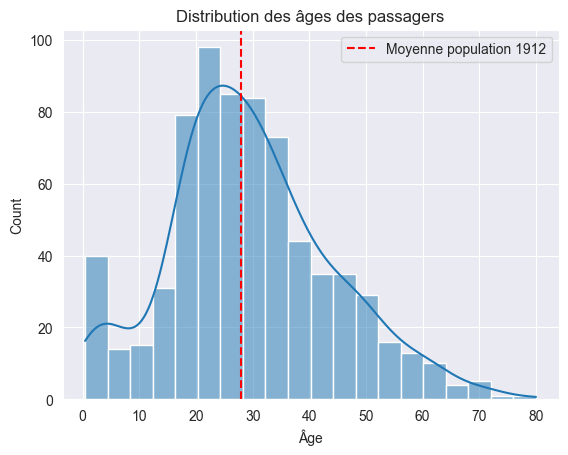

C:\Users\jonat\Code\TheBancalRepo\.venv312\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


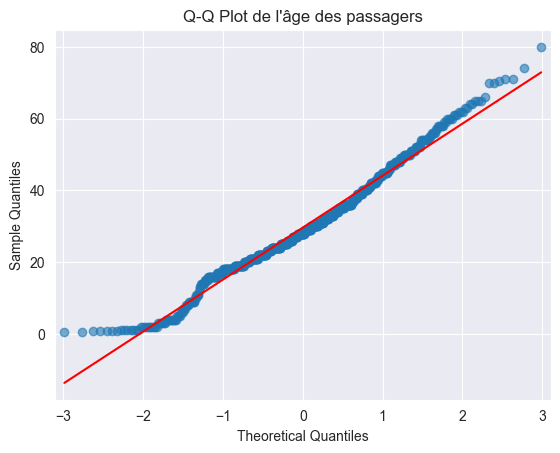

Statistique t = 3.0233009800374053, p-valeur = 0.002590259537786662
Conclusion : On rejette H0 ➡️ l'âge moyen est différent de 28 ans.
Moyenne de l'âge des passagers : 29.64209269662921
Écart-type de l'âge des passagers : 14.49293290032352
Cohen's d = 0.11330299449551398
Conclusion : L'effet est faible (0.2 < d < 0.5) ➡️ pas de différence significative.
Moyenne après suppression des outliers : 29.16572443181818
Médiane d'âge : 28.0
Proportion des passagers de moins de 20 ans : 23.03370786516854%
Proportion des passagers entre 20 et 59 ans : 73.45505617977528%
Proportion des passagers de 60 ans et plus : 3.51123595505618%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
import statsmodels.api as sm

# 1. Visualisation de la distribution des âges
sns.histplot(data_clean["Age"], kde=True)
plt.axvline(28, color='red', linestyle='--', label='Moyenne population 1912')
plt.legend()
plt.title("Distribution des âges des passagers")
plt.xlabel("Âge")
plt.show()

# 2. Vérification de la normalité avec un Q-Q plot
sm.qqplot(data_clean["Age"], line='s', marker='o', color='blue', alpha=0.6)
plt.title("Q-Q Plot de l'âge des passagers")
plt.show()

# 3. Test t pour une moyenne
t_stat, p_value = ttest_1samp(data_clean["Age"], popmean=28)
print(f"Statistique t = {t_stat}, p-valeur = {p_value}")

# 4. Décision
alpha = 0.05
if p_value < alpha:
    print("Conclusion : On rejette H0 ➡️ l'âge moyen est différent de 28 ans.")
else:
    print("Conclusion : On ne rejette pas H0 ➡️ pas de différence significative.")

# 5. Calcul de la moyenne et de l'écart-type
mean_age = data_clean["Age"].mean()
std_age = data_clean["Age"].std()
print(f"Moyenne de l'âge des passagers : {mean_age}")
print(f"Écart-type de l'âge des passagers : {std_age}")

# 6. Taille de l'effet : Cohen's d
cohen_d = (mean_age - 28) / std_age
print(f"Cohen's d = {cohen_d}")

print("Conclusion : L'effet est faible (0.2 < d < 0.5) ➡️ pas de différence significative.")

# Suppression des valeurs extrêmes (outliers) dans la variable `Age`
Q1 = data_clean["Age"].quantile(0.25)
Q3 = data_clean["Age"].quantile(0.75)
IQR = Q3 - Q1

# Définition des limites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les âges dans les limites acceptables
data_filtered = data_clean[(data_clean["Age"] >= lower_bound) & (data_clean["Age"] <= upper_bound)]

# Calcul de la nouvelle moyenne
mean_filtered = data_filtered["Age"].mean()
print(f"Moyenne après suppression des outliers : {mean_filtered}")


# Calcul de la médiane
median_age = data_clean["Age"].median()
print(f"Médiane d'âge : {median_age}")



# Comparaison avec les données de l'Insee : 
total_passagers = data_clean["Age"].count()

# Tranches d'âge
moins_20 = data_clean[data_clean["Age"] < 20].count()["Age"]
entre_20_59 = data_clean[(data_clean["Age"] >= 20) & (data_clean["Age"] < 60)].count()["Age"]
plus_60 = data_clean[data_clean["Age"] >= 60].count()["Age"]

# Calcul des pourcentages
pct_moins_20 = (moins_20 / total_passagers) * 100
pct_entre_20_59 = (entre_20_59 / total_passagers) * 100
pct_plus_60 = (plus_60 / total_passagers) * 100

# Affichage des résultats
print(f"Proportion des passagers de moins de 20 ans : {pct_moins_20}%")
print(f"Proportion des passagers entre 20 et 59 ans : {pct_entre_20_59}%")
print(f"Proportion des passagers de 60 ans et plus : {pct_plus_60}%")




---

**Q2: La survie dépend-elle de la classe du passager?**

Q2 : 
1. Identifier la ou les variables d'intérêt et spécifier le type.
Pour déterminer si la survie dépend de la classe du passager, nous utilisons les variables "Survived" (qui est qualitative binaire) et Pclass qui est qualitative ordinale (1, 2 et 3e classe). 

2. Réaliser une visualisation appropriée selon la ou les variables.
Voir graphiques ci-dessous. Nousa avons utilisé un graphique en barres (grouped bar chart) pour montrer le nombre de morts et survivants par classe. En effet, c'est sans doute le graphique le plus approprié pour montrer une relation entre 2 données qualitatives.

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
Hypothèse nulle (H0) : la survie ne dépend pas de la classe du passager.
Hypothèse alternative (H1) : la survie dépend de la classe du passager.

4. Identifier le test statistique approprié selon les hypothèses énoncées.
Pour cette deuxième question, nous avons deux variables qualitatives (survie ou non du passager, classe du passager). Dans ce cas, nous utilisons le "Chi Square Test" pour déterminer la relation entre ces 2 variables qualitatives. 

5. Vérifier la validation des assumptions selon le test identifié.
Pour valider les assumptions,  nous devons dans ce cas : 
    s'assurer que les échantillons sont aléatoires
    s'assurer d'avoir au moins 5 valeurs ou 5 "contingences" dans les données des 2 variables. 

Dans notre code, le test chi2_contingency de scipy calcule automatiquement ces effectifs attendus, et nous valide que l'assumption est respectée : les effectifs théoriques sont tous suffisamment grands.

6. Calculer la statistique ainsi que la p-valeur.
La p-valeur obtenue est de 0.000.

7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
La p-valeur est très largement inférieure à 0.05 : on rejette l'hypothèse nulle selon laquelle la survie du passager ne dépend pas de sa classe. Il existe une relation significative entre la classe du passager et sa probabilité de survie.

8. Interpréter le résultat et évaluer la taille de l'effet.
Selon nos résultats, nous arrivons aux conclusions suivantes : 
- Les passagers de première classe ont survécu en plus grande proportion (65% de survie selon les données à disposition) que ceux de 2e (48%) et 3e classe (24%).
- Ceux de 3e classe ont les chances de survie les plus basses : ils ont le taux de survie le plus bas.

Nous proposons les interprétations suivantes : les passagers de 1ère classe avaient accès plus rapidement et facilement aux canots de sauvetage. Leurs chambres étaient plus proches des ponts supérieurs alors que les passagers de 3e classe, eux, étaient "casés" plus bas dans le bateau. Les passagers de 1ère classe étaient donc plus rapidement mis en sécurité dans les canots, expliquant leur taux de survie plus élevé. 
Aussi, les passagers de 1ère classe avaient certainement un accès prioritaire en raison de leur statut social, en raison des normes de l'époque.
Enfin, il est de notoriété mondiale que le Titanic n'avait pas assez de places dans les canots de sauvetage pour sauver tout le monde à bord. Selon la source citée ci-dessous, le nombre de passagers par classe était le suivant : 
325 en première classe, 285 en deuxième classe et 706 en troisième classe. Etant donné le nombre élevé de passagers de 3e classe et le nombre limité de canots de sauvetage, un plus grand nombre de passagers de 3e classe n'a pas survécu, expliquant aussi le taux bas de survie de ces derniers.

Référence utilisée pour le nombre de passagers par classe : https://www.thecanadianencyclopedia.ca/fr/article/titanic



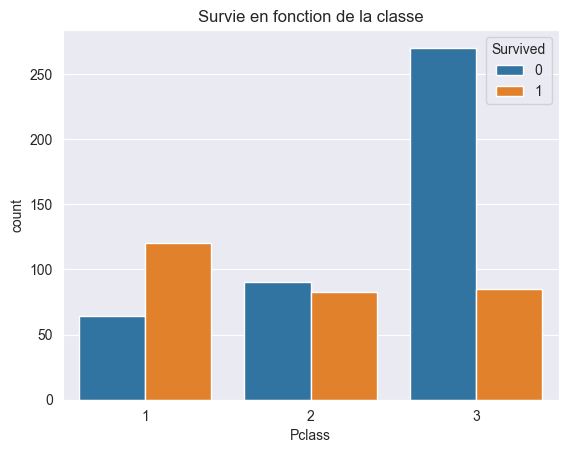

Chi2 = 91.081, p-value = 0.000
Conclusion : On rejette H0 ➡️  la survie dépend de la classe.
Taux de survie par classe :
Classe 1 : 65.22%
Classe 2 : 47.98%
Classe 3 : 23.94%


In [ ]:
from scipy.stats import chi2_contingency

# Visualisation
sns.countplot(x='Pclass', hue='Survived', data=data_clean)
plt.title("Survie en fonction de la classe")
plt.show()

# Tableau de contingence et test du Chi
contingency_table = pd.crosstab(data_clean["Pclass"], data_clean["Survived"])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.3f}, p-value = {p:.3f}")
if p < 0.05:
    print("Conclusion : On rejette H0 ➡️  la survie dépend de la classe.")
else:
    print("Conclusion : on ne rejette pas H0 ➡️ pas de différence significative.")


# Taux de survie par classe
survival_rates = data_clean.groupby("Pclass")["Survived"].mean() * 100
print("Taux de survie par classe :")
for cls, rate in survival_rates.items():
    print(f"Classe {cls} : {rate:.2f}%")


---

**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?** 


Références :
- Test de Welch : https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/


Q3 : 
1. Identifier la ou les variables d'intérêt et spécifier le type.
Les variables à utiliser ici sont : Age et Survived. Age est une variable quantitative continue et Suvived est qualitative binaire (0 ou 1).

2. Réaliser une visualisation appropriée selon la ou les variables.
Nous comparons ici la distribution de l'âge de deux groupes : les survivants et les passagers décédés. Pour ce faire, nous avons donc réalisé un box-plot. 

3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
HypotHhèse nulle (H0) : Il n’y a pas de différence d’âge moyen entre les survivants et les non-survivants.
Hypothèse alternative(H1) : Il existe une différence d’âge moyen entre les deux groupes

4. Identifier le test statistique approprié selon les hypothèses énoncées.
Nous avons deux échantillons : les survivants et les non-survivants. Nous devons donc comparer les moyennes de deux échantillons indépendants. La variance des échantillons n'est pas connue. La variable "Age" étant quantitative, c'est le t-test qui est le plus approprié.

5. Vérifier la validation des assumptions selon le test identifié.
Pour ce t-test, on doit vérifier deux principales hypothèses :
Indépendance des observations : Chaque passager est une personne différente. C'est en ordre ici.
Normalité des distributions : La normalité de l'âge peut être examinée par un Q-Q plot pour chaque groupe (survivants et non survivants). Ici, les points suivent approximativement la diagonale, donc la normalité est raisonnablement respectée.

6. Calculer la statistique ainsi que la p-valeur.
Statistique t : 2.184
p-valeur : 0.029

7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
On rejette l'hypothèse nulle, car évidemment, 0.029 est inférieur à 0.05. Il y a donc une différence significative d'âge entre les survivants et les passagers décédés.

8. Interpréter le résultat et évaluer la taille de l'effet.
Les résultats montrent une différence "statistiquement" significative entre l'âge moyen des passagers survivants et celui des non survivants (t = 2.184, p-valeur = 0.029).Cependant, la taille de l’effet, mesurée par le Cohen’s d, est de -0.168, ce qui correspond à un effet très faible (proche de 0).
Le signe négatif indique simplement que les passagers survivants sont en moyenne un peu plus jeunes que ceux qui ne l’ont pas été. On peut lier ceci au fait que les femmes et les enfants étaient priorisés pour monter sur les canots de sauvetage. Cela a donc joué un rôle sur l'âge des survivants, moins âgés donc que les décédés. Cependant, la différence d’âge reste faible.

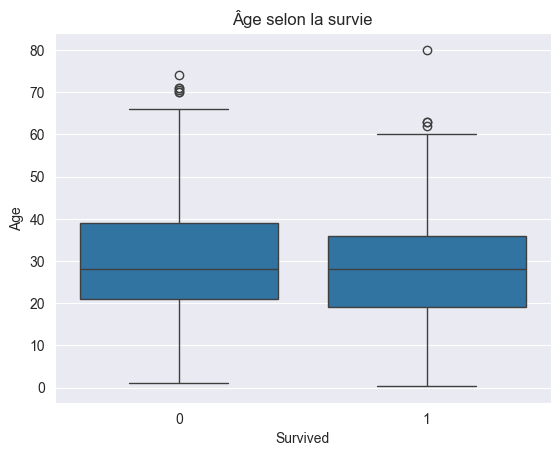

t = 2.184, p-value = 0.029
conclusion : on rejette H0 ➡️ différence significative d'âge.
Cohen's d = -0.168


In [ ]:
from scipy.stats import ttest_ind
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Visualisation
sns.boxplot(x="Survived", y="Age", data=data_clean)
plt.title("Âge selon la survie")
plt.show()

# Test t d'indépendance
group_not_survived = data_clean.loc[data_clean["Survived"] == 0, "Age"]
group_survived = data_clean.loc[data_clean["Survived"] == 1, "Age"]
t_statistic, p_value_diff_age = ttest_ind(group_not_survived, group_survived, equal_var=False)
print(f"t = {t_statistic:.3f}, p-value = {p_value_diff_age:.3f}")
if p_value_diff_age < alpha:
    print("conclusion : on rejette H0 ➡️ différence significative d'âge.")
else:
    print("conclusion : on ne rejette pas H0 ➡️ pas de différence significative.")


# Q-Q plot pour les passagers non survivants
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
stats.probplot(group_not_survived.dropna(), dist="norm", plot=plt)
plt.title("Q-Q plot - Non survivants")

# Q-Q plot pour les passagers survivants
plt.subplot(1, 2, 2)
stats.probplot(group_survived.dropna(), dist="norm", plot=plt)
plt.title("Q-Q plot - Survivants")

plt.tight_layout()
plt.show()


mean1 = group_survived.mean()
mean2 = group_not_survived.mean()
std1 = group_survived.std()
std2 = group_not_survived.std()

# Cohen's d pour échantillons indépendants
n1 = len(group_survived)
n2 = len(group_not_survived)
pooled_std = np.sqrt(((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / (n1 + n2 - 2))
cohen_d = (mean1 - mean2) / pooled_std
print(f"Cohen's d = {cohen_d}")

**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**